**Importing Libraries**

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

These lines import the necessary libraries for the program. pandas and numpy are used for data manipulation, xgboost is used for the XGBoost algorithm, train_test_split is used to split the data into training and testing sets, mean_squared_error and r2_score are used to evaluate the model, and matplotlib is used for plotting.

**Loading the Dataset**

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

These lines load the Boston Housing dataset from the specified URL. The dataset is read into a Pandas DataFrame using pd.read_csv. The sep parameter is set to \s+ to specify that the values are separated by one or more whitespace characters. The skiprows parameter is set to 22 to skip the first 22 rows of the file, which contain metadata. The header parameter is set to None to specify that the file does not have a header row. The data is then split into features (data) and target values (target) using NumPy's hstack function.

**Creating a Pandas DataFrame**

In [9]:
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target

These lines create a Pandas DataFrame from the loaded data. The column names are specified using the columns parameter. The target values are added to the DataFrame as a new column called PRICE.

**Splitting the Data**

In [10]:
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

These lines split the data into training and testing sets using train_test_split. The test_size parameter is set to 0.2 to specify that 20% of the data should be used for testing. The random_state parameter is set to 42 to ensure reproducibility.

**Training the XGBoost Model**

In [11]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

These lines train an XGBoost model using the training data. The XGBRegressor class is used to create an XGBoost regressor object, and the fit method is used to train the model.

**Making Predictions**

In [12]:
y_pred = xgb_model.predict(X_test)

This line makes predictions on the testing data using the trained model.

**Evaluating the Model**

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R2 score:", r2)

Mean Squared Error (MSE): 6.909231565384943
R2 score: 0.9057837838492537


These lines evaluate the model using the Mean Squared Error (MSE) and R2 score metrics. The mean_squared_error function is used to calculate the MSE, and the r2_score function is used to calculate the R2 score.

**Hyperparameter Tuning**

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1], 'n_estimators': [50, 100, 200]}
grid = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score: -11.722076611218103


These lines perform hyperparameter tuning using GridSearchCV. The param_grid dictionary specifies the hyperparameters to tune, and the GridSearchCV object is used to perform the search. The fit method is used to train the model with the best hyperparameters, and the best_params_ and best_score_ attributes are used to retrieve the best hyperparameters and score.

**Visualizing Results**

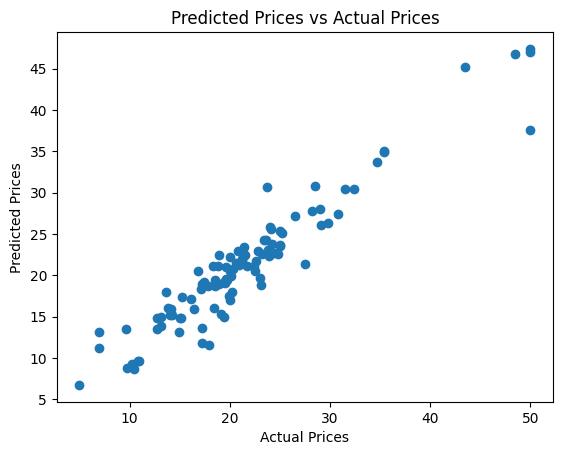

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.show()

The above code lines create a visualization of the prediction results using a scatter plot, to compare the actual price with the predicted price.

That is the explanation of each line of code for the House Price Prediction program using XGBoost and the Boston Housing dataset from Kaggle.

**Conclusion**

This program loads the Boston Housing dataset from Kaggle, preprocesses the data, splits it into training and testing sets, trains an XGBoost model, makes predictions on the testing set, evaluates the model using MSE and R2 score, performs hyperparameter tuning using GridSearchCV, and visualizes the predicted prices vs actual prices using a plot.